Setup
=====
Define a folder structure for saving the build including separate folders for data, tables and figures.

In [1]:
import os
from stages import setup

data_dir, tables_dir, figs_dir = setup.build()

Stage I: Prepare data
=====================

Download and format
-------------------
In a first step the source data are downloaded from their repository on Zenodo: all data for the rifampicin study including imaging data, demographics and blood values. 

The metadata saved in '_static/MRI_metadata.dmr' are inserted which classify the biomarkers into categories that are useful in the analysis and visualisation. 

The data are subsequently combined into a single file `all_data.dmr` for ease of access. The original files are preserved as well in case verification of intermediate steps are needed.

The results from these computation steps are saved in *build/Data*.

In [2]:
from stages import data

# Download the source data from Zenodo
data.download()

# Extend the metadata with with static metadata
data.set_metadata()

# Combine all data into a single file for convenience
data.combine()

Compute derived values
----------------------

Next we compute some useful values that are not included in the source dataset:

1. standard deviations for some key derived parameters have not been computed by default but can be derived later using error propagation.
2. A number of additional meaningful parameters are derived such as average blood values over the course of the visit, or changes in R1.

These new values are added to the same master file 'build/Data/all_data.dmr'.

In [3]:
# Compute some missing standard deviations
data.compute_sdev()

# Compute derived parameters
data.compute_derived()

Variable selection
------------------
Some parameters are not of interest when measuring drug effects, such as timings of acquisitions or blood values at the start of the visit. In this final step these are dropped from the dataset. 

In order to simplify subsequent analyses this step also drops parameters that are highly correlated to others (such as AUC's in R1) or not of primary interest (such as initial and final excretion rates). 

The remaining parameters are saved in a separate file `all_data_effect.dmr` and will be taken forward into the main statistical analysis.

In [4]:
data.select_response_markers()

Stage II: Summaries and descriptive statistics
==============================================

In the next stage some descriptive tables are built and saved in the folder 'build/tables'. The details can be found in the `desc.py` module in `stages`. These tables mainly serve for a visual check of the results, and to simplify some of the analyses that are performed later on.

In [5]:
import pandas as pd
from stages import desc

Summarise visits
----------------
First we create a table that displays the parameter values in wide format for easier visual inspection and further analysis. The table is saved as 'vals.csv'. The function also saves values for each of the three visits separately in wide format ('vals_screening.csv', 'vals_control.csv', 'vals_drug.csv').

In [6]:
# Build all summary tables
desc.summarise_visits()

# Check the result for the control visit as an example
file = os.path.join(tables_dir, 'vals_control.csv')
pd.read_csv(file, index_col=0)

,LDS-001,LDS-002,LDS-003,LDS-004,LDS-005,LDS-006,LDS-007,LDS-008,LDS-009,LDS-010
parameter,,,,,,,,,,
AUC35_Cb,106.249561,17.569589,12.496261,36.754483,37.763632,27.201055,36.412157,28.287322,29.523124,37.213831
AUC35_Cl,658.201182,106.455218,78.233739,190.428560,211.858270,197.212079,188.073295,162.374834,108.623454,151.797384
AUC_Cb,156.991857,26.952165,13.077369,44.346215,46.368582,35.903077,67.068617,39.757516,41.786649,78.637748
AUC_Cl,2611.193174,346.519177,219.644005,945.444404,527.225272,623.218937,656.683630,434.215682,287.462039,562.825119
AvrALP,47.000000,112.500000,68.500000,118.000000,39.500000,64.000000,56.000000,54.500000,53.000000,64.500000
...,...,...,...,...,...,...,...,...,...,...
t2,11.739447,15.418113,13.460626,12.433069,13.607810,15.180715,17.149265,16.562825,16.221258,16.302099
t2_MOLLI,10.411200,11.615238,11.655478,10.700176,11.798355,13.722151,16.253286,15.427625,15.155603,15.021079
t3,12.572476,16.167198,14.262860,13.098651,14.332372,15.863111,18.062578,17.312081,17.043949,17.136296


Effect size
-----------
Build tables showing the absolute effect size $(v_\textrm{drug}-v_\textrm{control})$ and relative effect size $100*(v_\textrm{drug}/v_\textrm{control} - 1)$ for each parameter and each subject in wide format. Results are saved in tables *effect_size_absolute.csv* and *effect_size_relative.csv*:  

In [7]:
# Build tables with absolute and relative effect sizes
desc.effect_size()

# Inspect the results for relative effect size
file = os.path.join(tables_dir, 'effect_size_relative.csv')
pd.read_csv(file, index_col=0).T

subject,LDS-002,LDS-003,LDS-004,LDS-006,LDS-007,LDS-008,LDS-009,LDS-010
AUC35_Cb,-1.945791,60.013762,32.792702,12.451937,22.815815,45.484545,45.185527,-2.401527
AUC35_Cl,-84.677238,-74.645724,-81.394446,-86.267779,-82.761112,-83.605896,-77.583530,-84.159054
AvrALP,9.333333,13.138686,-2.542373,-21.093750,4.464286,-22.018349,19.811321,-5.426357
AvrALT,30.232558,0.000000,-2.777778,-16.666667,45.454545,82.142857,7.228916,-6.060606
AvrAlb,2.325581,-2.173913,-1.351351,-5.882353,-8.045977,-6.976744,-9.890110,-1.204819
AvrBili,30.434783,123.809524,46.428571,246.153846,42.857143,95.652174,10.714286,59.259259
AvrConBili,205.000000,228.571429,128.571429,183.333333,40.000000,NaN,45.454545,190.000000
AvrConTotBili,6.896552,42.028986,58.000000,-20.430108,0.000000,NaN,33.333333,41.891892
CL,-92.156009,-84.556151,-89.379696,-94.736182,-93.477507,-94.409561,-94.614510,-95.167041
CO,59.524768,-17.141265,45.143003,81.824930,-10.420767,-11.522115,-8.826255,4.069263


T-statistic
===========
Absolute and relative effect sizes are not directly comparable between different biomarkers: Absolute effect sizes are in different units, and relative effect sizes are biased by the baseline value. 

The t-statistic is a better metric to compare the magnitude of the effect between markers, as it normalises the size of the effect to the variability across the population. The following function computes the t-statistic for each biomarkers and each subject, and saves the results in *build/t_statistic.csv*:

In [8]:
desc.t_statistic()

# Inspect output
file = os.path.join(tables_dir, 't_statistic.csv')
pd.read_csv(file, index_col=0)

,LDS-002,LDS-003,LDS-004,LDS-006,LDS-007,LDS-008,LDS-009,LDS-010
parameter,,,,,,,,
AUC35_Cb,-0.168192,3.689587,5.929722,1.666362,4.087231,6.329982,6.563092,-0.439682
AUC35_Cl,-6.361816,-4.121417,-10.938917,-12.006865,-10.985022,-9.580830,-5.947585,-9.015973
AvrALP,3.069659,2.631136,-0.877045,-3.946705,0.730871,-3.508182,3.069659,-1.023220
AvrALT,3.520731,0.000000,-0.270825,-2.166604,4.062382,6.228986,1.624953,-0.541651
AvrAlb,1.528521,-1.528521,-0.764260,-3.821302,-5.349822,-4.585562,-6.878343,-0.764260
AvrBili,4.359594,8.096389,4.048195,9.964786,3.736795,6.850791,0.934199,4.982393
AvrConBili,8.549091,3.336231,1.876630,2.293659,0.834058,NaN,1.042572,3.961774
AvrConTotBili,0.823477,3.980137,3.980137,-2.607676,0.000000,NaN,3.568399,4.254629
CL,-16.188224,-10.239041,-10.912471,-13.982249,-16.749795,-17.954903,-14.117530,-16.690568


Demographics table
------------------
Now we want to display some summary statistics to characterise the population, including variables collected at the screening visit and average LFT's taken at the control visit. The table is intended for publication so includes informative human readable names for variables as well as their units.

In [9]:
desc.demographics()

# Inspect the result
file = os.path.join(tables_dir, 'table_demographics.csv')
pd.read_csv(file, index_col=0)

,count,mean,std,min,25%,50%,75%,max
parameter,,,,,,,,
Age (yr),10.0,32.5,8.3,21.0,27.0,32.0,35.5,51.0
ALP (U/L),10.0,67.8,26.5,39.5,53.4,60.0,67.5,118.0
ALT (U/L),10.0,20.8,8.2,14.0,16.5,17.8,23.4,41.5
Albumin (g/L),10.0,42.3,2.8,37.0,41.8,42.8,43.4,46.0
Bilirubin (umol/L),10.0,13.0,4.2,6.5,10.8,12.8,14.0,23.0
Conjugated Bilirubin (umol/L),10.0,4.7,2.1,3.0,3.5,4.2,5.0,10.0
Conjugated/total bilirubin (%),10.0,36.2,6.4,25.0,33.4,36.2,39.0,46.5
BMI (kg/m2),10.0,24.4,3.5,18.7,22.6,24.0,26.8,30.0
Creatinine (umol/L),10.0,77.1,13.3,58.0,67.2,79.5,86.8,98.0


Mean values
-----------
Build a table showing mean and 95% confidence interval on the mean for all parameters at each of the two visits (control and drug), and for their relative effect sizes. 

In [10]:
desc.averages()

# Check the results
file = os.path.join(tables_dir, 'averages.csv')
pd.read_csv(file, index_col=0)

,control Mean,control 95%CI,drug Mean,drug 95%CI,Effect Mean,Effect 95%CI
parameter,,,,,,
AUC35_Cb,36.900,16.000,35.2000,8.1000,26.800,16.0
AUC35_Cl,205.000,100.000,25.8000,4.3000,-81.900,2.7
AvrALP,67.800,16.000,73.9000,21.0000,-0.542,11.0
AvrALT,20.800,5.100,24.1000,6.5000,17.400,23.0
AvrAlb,42.300,1.700,40.9000,1.8000,-4.150,2.9
AvrBili,13.000,2.600,22.0000,2.8000,81.900,52.0
AvrConBili,4.700,1.300,12.6000,6.2000,146.000,57.0
AvrConTotBili,36.200,4.000,44.6000,5.3000,23.100,21.0
CL,0.265,0.028,0.0199,0.0044,-92.300,2.5


Stage III: Statistical analyses
==============================
In this section the statistical analyses are performed and results are saved as tables in *src/build/Tables*. 

In [11]:
from stages import stats

LFT differences between visits
------------------------------

The first analysis compares the LFT values at the start of each visit, to verify that no systematic differences in liver function are present between visits. The table shows mean values for each visit (95%CI), the difference and the result of a paired t-test.

In [12]:
stats.lft_between_visits()

# Inspect the result
file = os.path.join(tables_dir, 'table_lft_between_visits.csv')
pd.read_csv(file, index_col=0)

,V1,V2,Diff,p
parameter,,,,
ALP,67.6 (40.1),69.4 (54.1),1.8 (23.1),0.687
ALT,21.8 (18.7),25.4 (18.9),3.6 (9.4),0.069
Alb,44.5 (4.1),43.9 (5.9),-0.6 (6.3),0.598
Bili,12.1 (8.5),11.4 (9.3),-0.8 (11.6),0.731
ConBili,4.8 (3.7),4.6 (4.2),-0.1 (5.1),0.890
ConTotBili,39.4 (11.3),37.3 (9.1),-3.0 (15.6),0.358


t-test for drug effects
-----------------------
Compare all response markers between control and treatment visit using a paired t-test. The raw output is saved in *ttest.csv*:

In [13]:
stats.ttest()

# Inspect the result
file = os.path.join(tables_dir, 'ttest.csv')
pd.read_csv(file, index_col=0)

,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,odds-ratio,parameter
Contrast,,,,,,,,,,,
study,control,drug,True,True,-3.457263,7.0,two-sided,0.010587,6.246,2.955560e-01,AUC35_Cb
study,control,drug,True,True,8.619803,7.0,two-sided,0.000056,441.160,9.849709e+02,AUC35_Cl
study,control,drug,True,True,-0.018272,7.0,two-sided,0.985932,0.336,9.959533e-01,AvrALP
study,control,drug,True,True,-1.557246,7.0,two-sided,0.163369,0.812,5.626674e-01,AvrALT
study,control,drug,True,True,2.770444,7.0,two-sided,0.027676,2.967,3.385960e+00,AvrAlb
study,control,drug,True,True,-5.371643,7.0,two-sided,0.001040,39.942,2.806959e-02,AvrBili
study,control,drug,True,True,-3.127716,6.0,two-sided,0.020384,3.891,1.082997e-01,AvrConBili
study,control,drug,True,True,-1.999872,6.0,two-sided,0.092443,1.269,1.531299e-01,AvrConTotBili
study,control,drug,True,True,14.604347,7.0,two-sided,0.000002,8478.976,1.174265e+06,CL


Summarise univariate analyses
---------------------------
The next function does not compute new results but combines all key univariate results in a single table - averages and their 95%CI for each visit, relative effect size, T-statistic and p-value of the paired t-test.  

The results are saved in two different tables, one for the liver (*table_liver_univariate.csv*) and one for the systemic parameters (*table_aorta_univariate.csv*). The tables are formatted with a view on publication in the report

In [14]:
stats.univariate()

# Inspect the result for then liver
file = os.path.join(tables_dir, 'table_liver_univariate.csv')
pd.read_csv(file, index_col=0)

,Name,Group,control,drug,Effect size (%),T,p-value
parameter,,,,,,,
AvrBili,Bilirubin (umol/L),LFT,13.0 (2.6),22.0 (2.8),81.9 (52.0),-5.4,0.001
AvrConBili,Conjugated Bilirubin (umol/L),LFT,4.7 (1.3),12.6 (6.2),146.0 (57.0),-3.1,0.020
AvrAlb,Albumin (g/L),LFT,42.3 (1.7),40.9 (1.8),-4.15 (2.9),2.8,0.028
AvrConTotBili,Conjugated/total bilirubin (%),LFT,36.2 (4.0),44.6 (5.3),23.1 (21.0),-2.0,0.092
AvrALT,ALT (U/L),LFT,20.8 (5.1),24.1 (6.5),17.4 (23.0),-1.6,0.163
AvrALP,ALP (U/L),LFT,67.8 (16.0),73.9 (21.0),-0.542 (11.0),-0.0,0.986
CL,Liver blood clearance (L/min),MRI,0.265 (0.028),0.0199 (0.0044),-92.3 (2.5),14.6,0.000
R1_45min,R1 at 45mins (1/sec),MRI,2.33 (0.82),1.38 (0.083),-26.1 (3.2),12.1,0.000
khe,Hepatocellular uptake rate (mL/min/100cm3),MRI,29.7 (4.5),2.17 (0.59),-92.6 (2.5),10.6,0.000


Correlation analysis (control data)
-----------------------------------
The next step in the analysis looks at the correlations between variables at baseline, including only variables that are used as response markers. 

The function saves pairwise correlations of liver MRI biomarkers with biomarkers from other groups, and for each saves the values of correlation coefficient and the p-value of the correlation test:

1. Correlations among liver MRI biomarkers (*correl_control_vals.csv*, *correl_control_pval.csv*).
2. Correlations with systemic MRI biomarkers (*correl_aorta_control_vals.csv*, *correl_aorta_control_pval.csv*).
3. Correlations with liver function tests in blood (*correl_liver_blood_control_vals.csv*, *correl_liver_blood_control_pval.csv*).
4. Correlations with demographics taken during the screening visit (*correl_liver_blood_control_vals.csv*, *correl_liver_blood_control_pval.csv*).

In [15]:
stats.correlations_control()

# Check correlation coefficients with LFTs as an example
file = os.path.join(tables_dir, 'corr_blood_control_vals.csv')
pd.read_csv(file, index_col=0).T

X,AvrALP,AvrALT,AvrAlb,AvrBili,AvrConBili,AvrConTotBili
AUC35_Cl,-0.316055,0.067112,-0.172597,-0.293634,-0.393603,-0.434708
CL,-0.046845,-0.079068,0.321599,0.337052,0.498998,0.500404
DR1_45min,-0.323356,0.103399,-0.065384,-0.280047,-0.369877,-0.421634
DR1_scan2,-0.338646,0.126180,-0.010986,-0.274102,-0.369175,-0.427781
De,-0.649260,-0.018790,0.117715,-0.694729,-0.740796,-0.315679
R1_45min,-0.310124,0.080976,-0.051108,-0.271720,-0.361982,-0.425001
R1_scan2,-0.314643,0.084139,0.014480,-0.259538,-0.355609,-0.435319
RE_R1l,-0.382697,0.072727,-0.159226,-0.370811,-0.457987,-0.420809
RE_Sl,-0.408740,0.016632,-0.210534,-0.429058,-0.515069,-0.420621
Te,-0.540966,-0.027180,0.291109,-0.642915,-0.637599,-0.165971


Correlation analysis (effect size)
----------------------------------
This step repeats the same analysis of correlations, but this time between absolute effect sizes of the parameters rather than their absolute values at baseline. The outputs follow a similar naming convention, replacing 'control' by 'effect'. 

In [16]:
stats.correlations_effect()

# Check correlation coefficients with LFTs as an example
file = os.path.join(tables_dir, 'corr_blood_effect_vals.csv')
pd.read_csv(file, index_col=0).T

X,AvrALP,AvrALT,AvrAlb,AvrBili,AvrConBili,AvrConTotBili
AUC35_Cl,0.793210,0.087115,0.183457,-0.210261,0.383620,0.526531
CL,0.263320,-0.635522,0.192779,0.154858,-0.250076,0.359375
DR1_45min,0.866007,0.117274,0.382417,-0.512232,0.644945,0.448371
DR1_scan2,0.471115,-0.304912,0.671916,-0.018591,0.794698,0.321693
De,0.149480,0.275692,0.613588,-0.221979,0.778708,-0.053225
R1_45min,0.847975,0.296521,0.288266,-0.559430,0.568158,0.485898
R1_scan2,0.301186,-0.270425,0.670345,0.113337,0.756095,0.321168
RE_R1l,0.771877,0.228304,0.391214,-0.331432,0.591627,0.573549
RE_Sl,0.760478,0.159958,0.425780,-0.337777,0.606715,0.584077
Te,-0.011259,0.127206,0.278386,-0.488106,0.387512,0.190764


Stage IV: Visualisation
=======================
In this section we create figures to show the results from the statistical analyses and visualise the main observations. ALl outputs are saved in the folder *build/Figs*.

In [17]:
from IPython.display import Image
from stages import plot

Primary outcomes
----------------
The primary outcomes of the study are effect sizes of uptake and excretion rates. The following function generates a figure which shows these as box plots and as line plots in different panels. The result is saved as *primary_outcomes.png*.

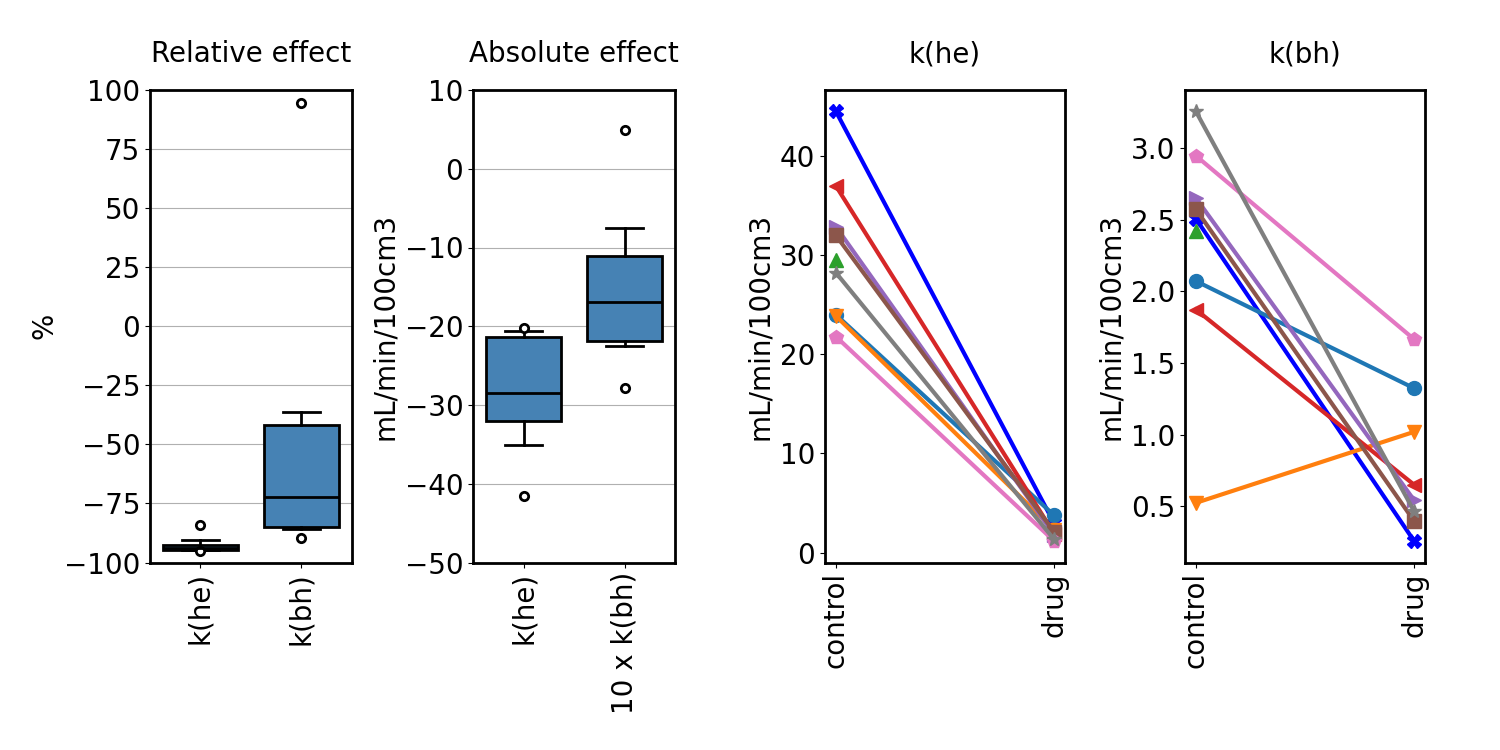

In [18]:
# Create the figure
plot.primary_outcomes()

# Inspect the result
Image(os.path.join(figs_dir, 'primary_outcomes.png'))

Secondary outomes
-----------------
A secondary question is to what extent other parameters, such as LFT's or other MRI measures, also show the effect of the drug. The following script summarises that results, showing all parameters that respond significantly. The figure shows the distribution of the their t-statistic, as well as similar line plots as above to visualse their effect in individuals.

The result is saved in the file *secondary_outcomes.png*.

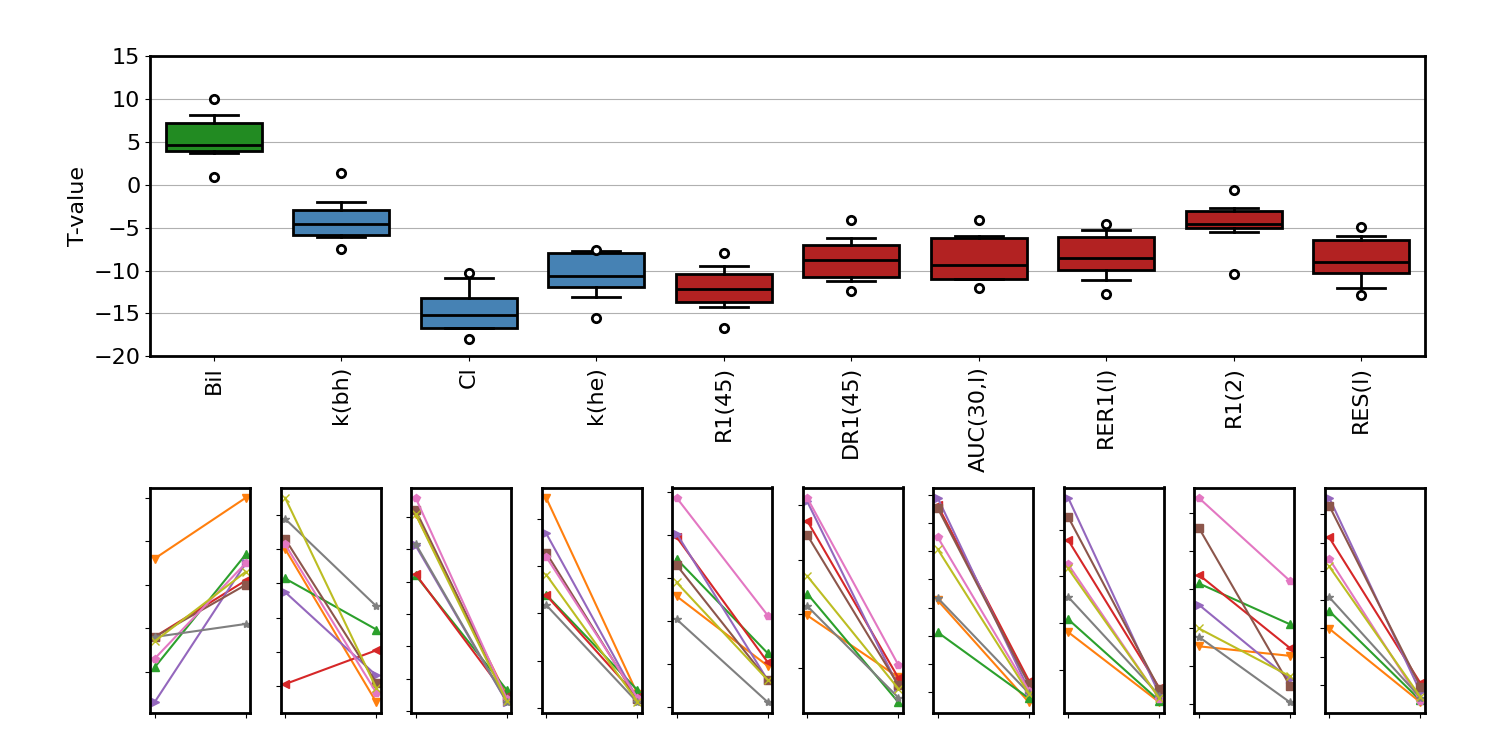

In [19]:
# Create the figure
plot.secondary_outcomes()

# Inspect the result
Image(os.path.join(figs_dir, 'secondary_outcomes.png'))

Correlations at baseline
------------------------
The correlations between response markers at baseline are visualised using a clustered correlation matrix, using a star symbol to indicate significant correlations. The composite figure is saved in the file *correlations_control.png*. The individul panels of the figure are saved as intermediate steps with similar naming conventions.

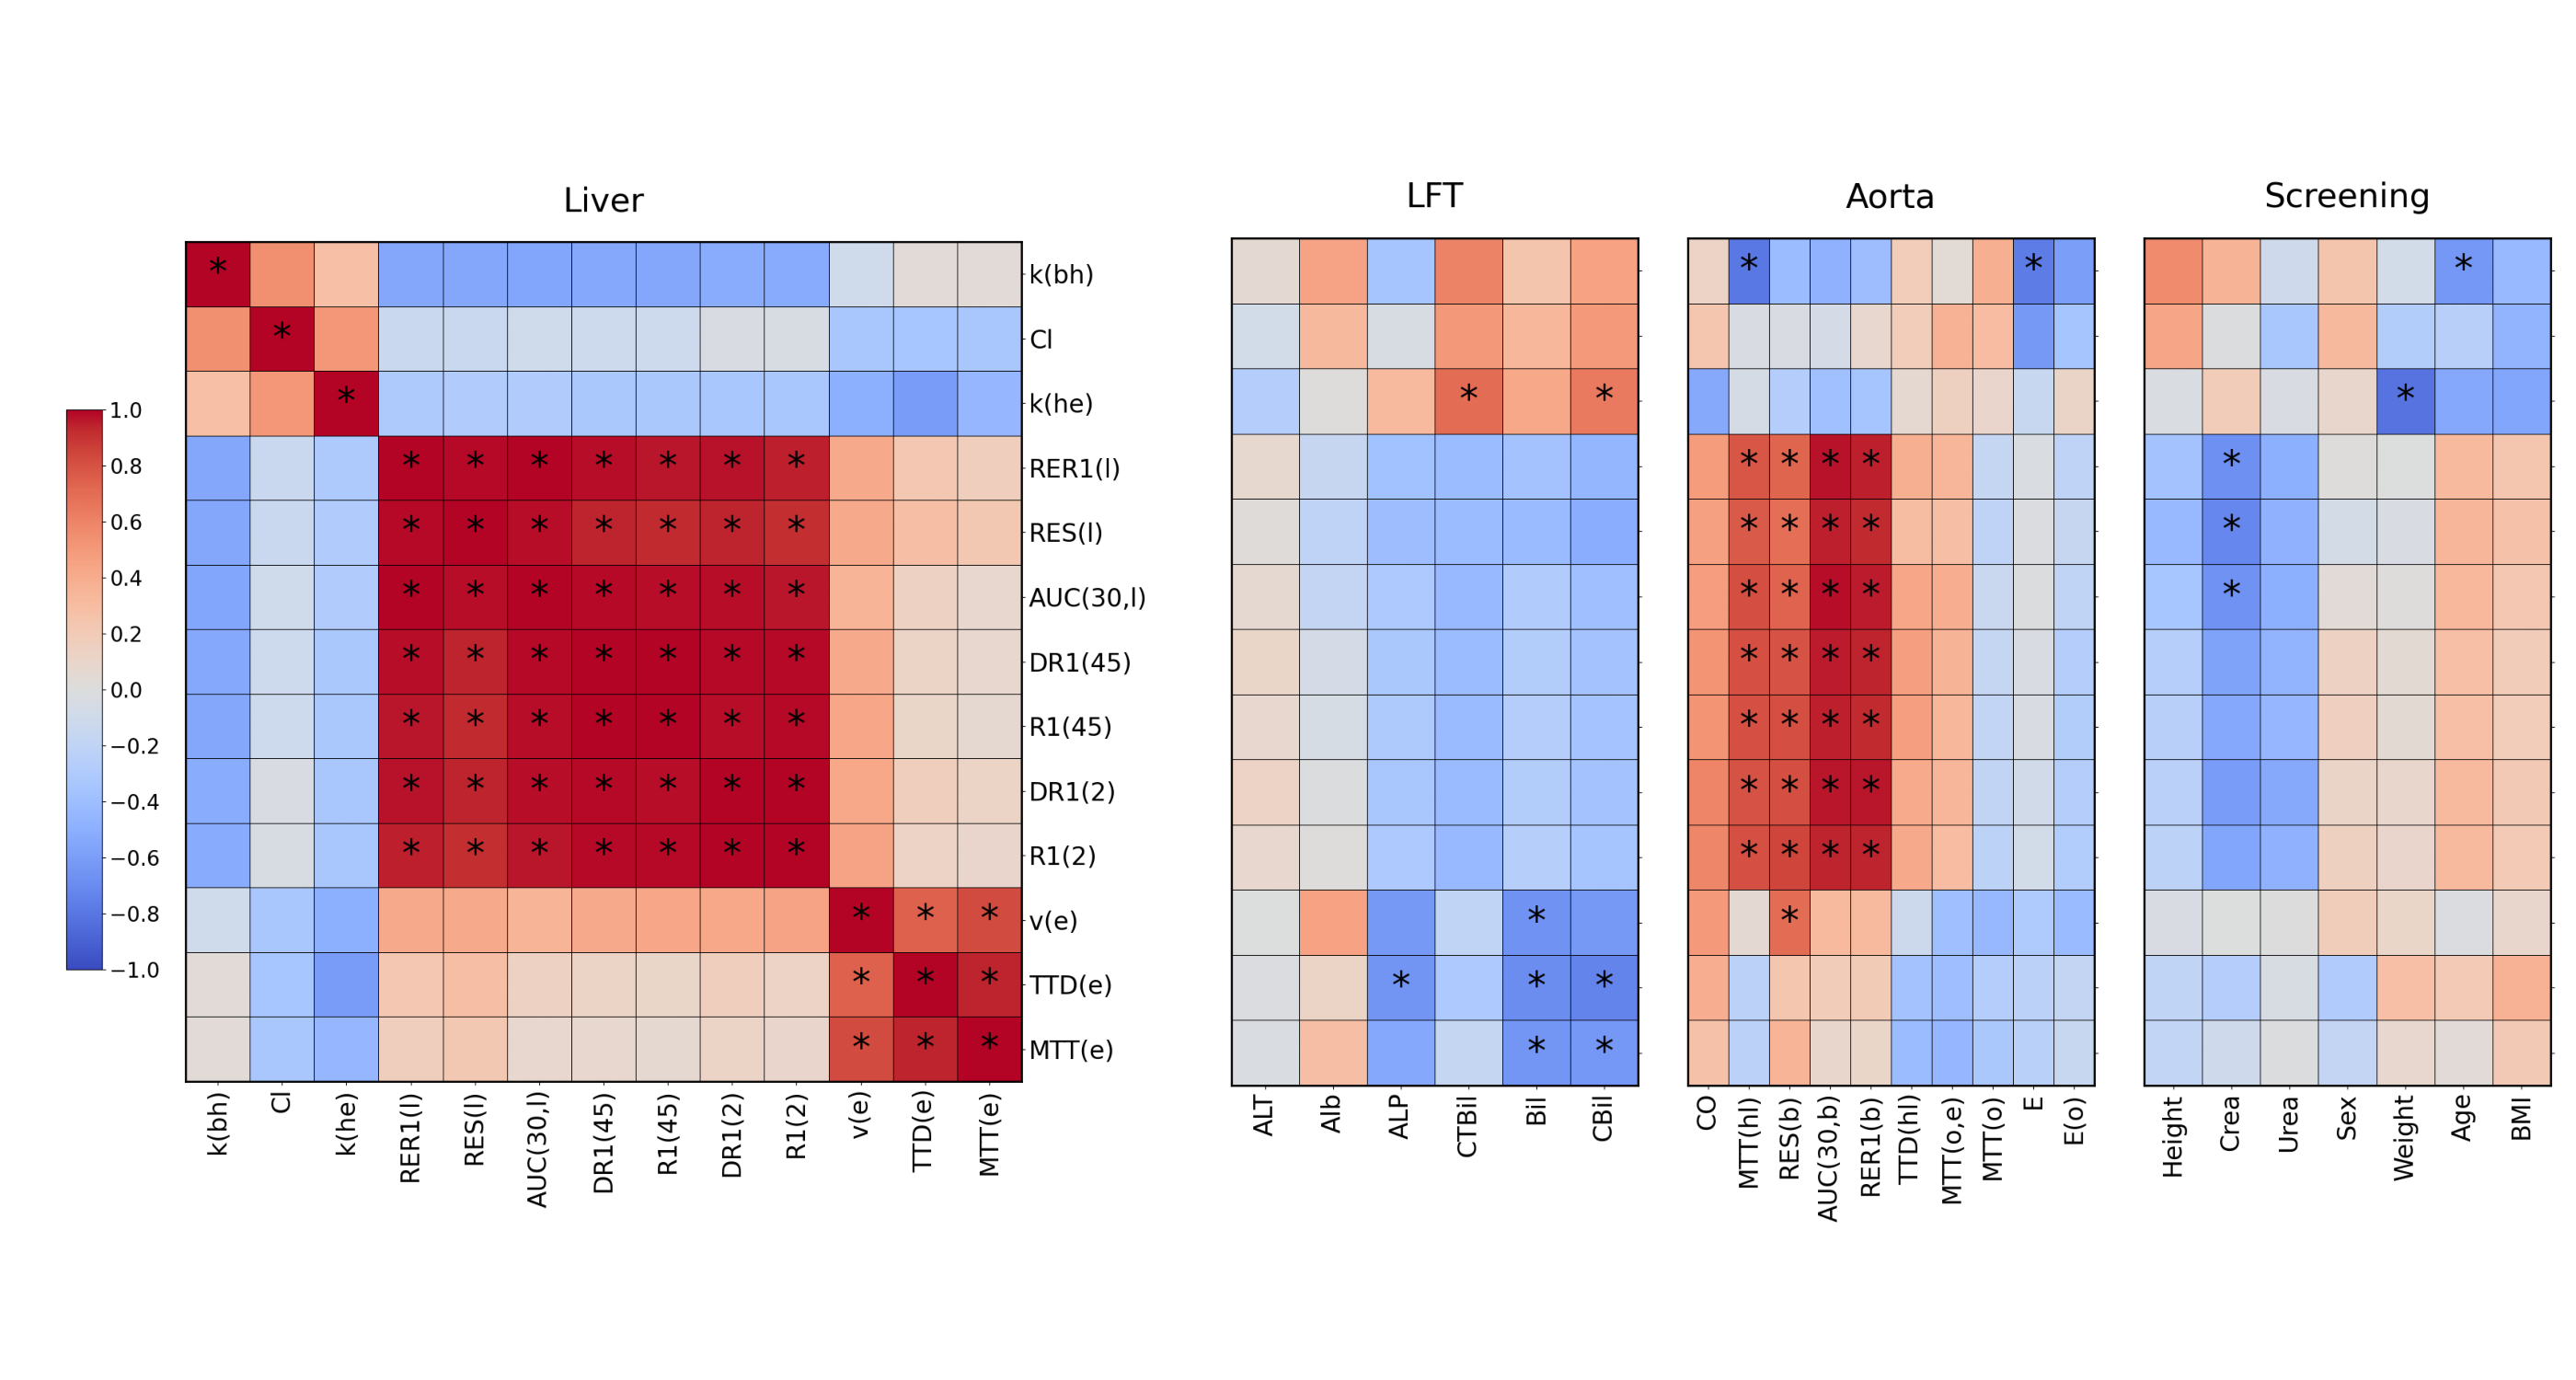

In [20]:
# Create the figure
plot.correlations_control()

# Inspect the result
Image(os.path.join(figs_dir, 'correlations_control.png'))

Correlations between effect sizes
---------------------------------
Next the same plots are made, but this time showing correlation between absolute effect sizes rather than absolute values at baseline.

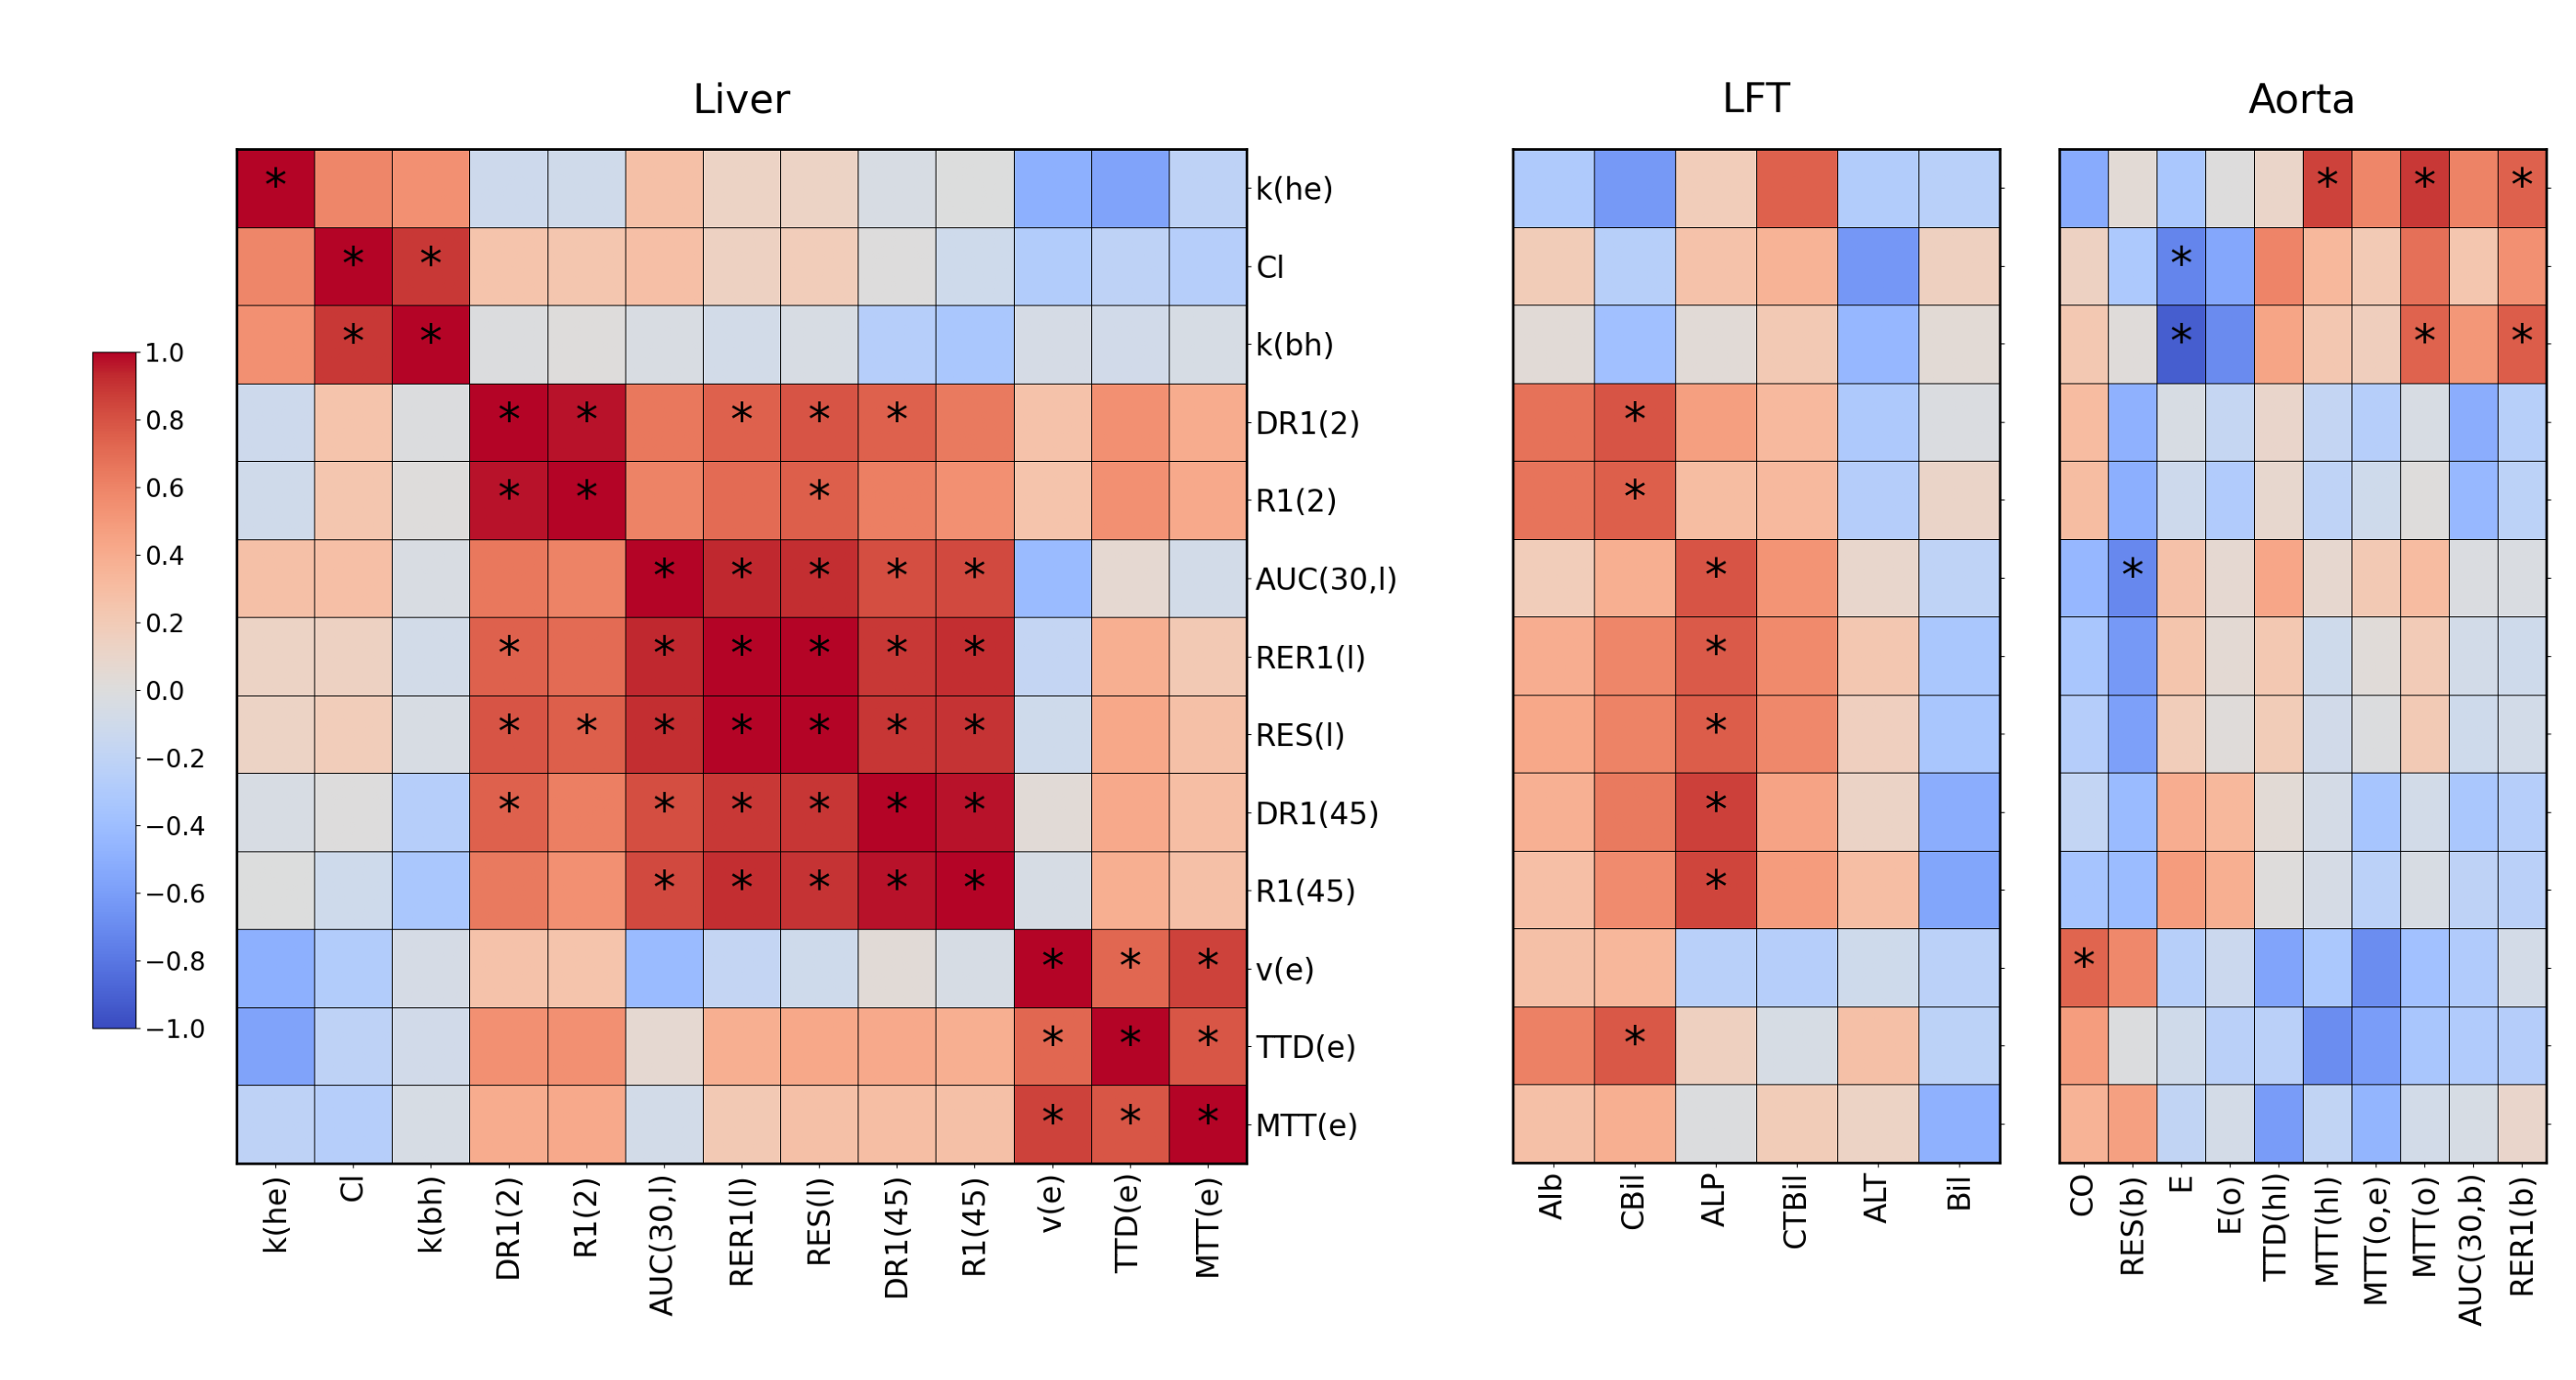

In [21]:
# Create the figure
plot.correlations_effect()

# Inspect the result
Image(os.path.join(figs_dir, 'correlations_effect.png'))

Subject clustering
------------------
A final figure performs a clustering a subjects based on their baseline values and effect sizes. This is an explorative figure intended as a template for future larger studies.

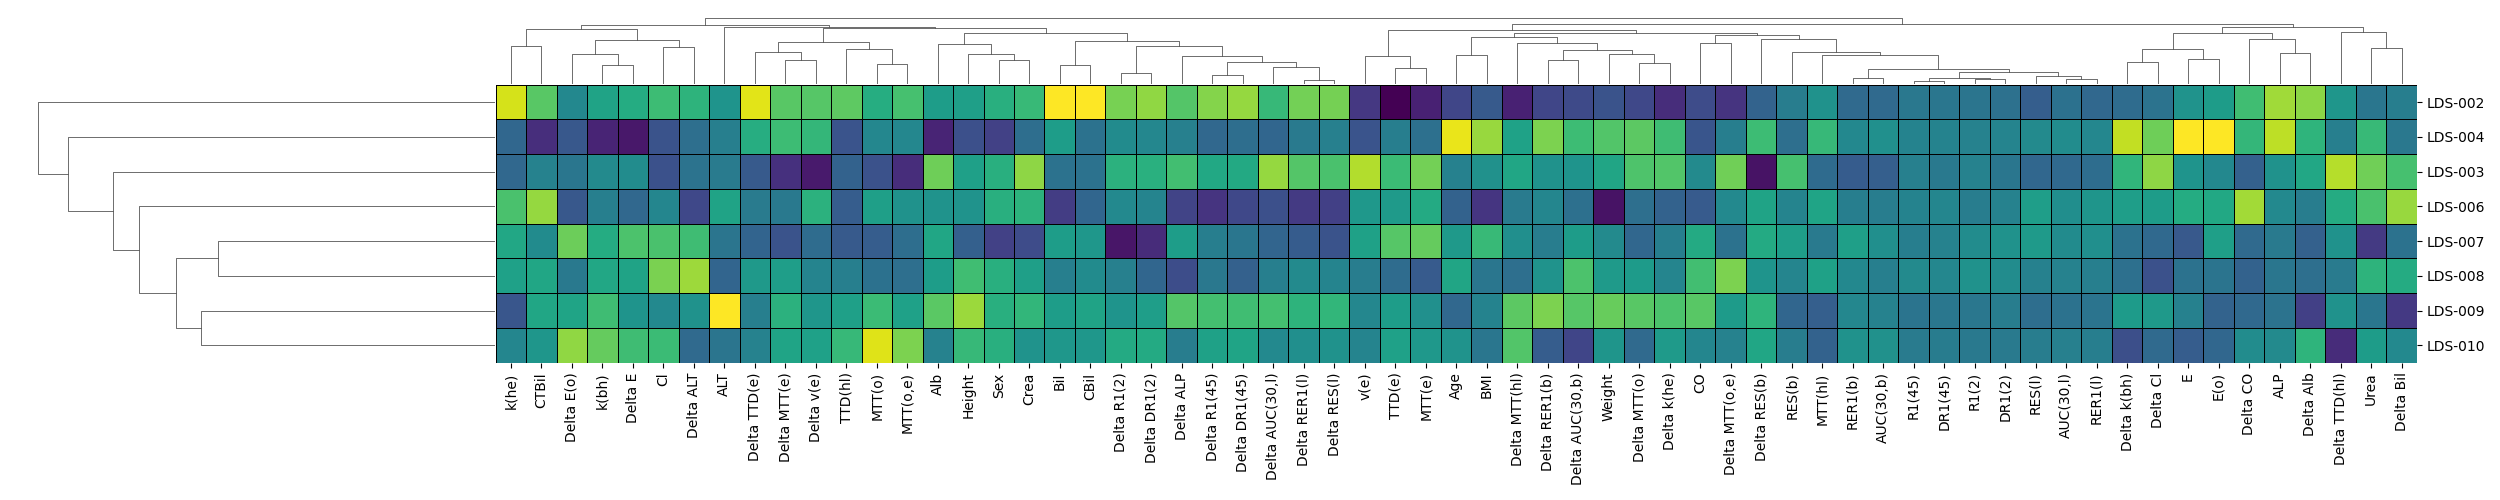

In [22]:
plot.clustering()

Image(os.path.join(figs_dir, 'clustering.png'))

Stage V: Build report
=====================
The final stage in the analysis pipeline involves building a pdf report with key results - mainly to circulate to collaborators rather than as a polished final output.

In [24]:
from stages import report

report.main()

Creating report..


The results can be found under 'build/Report.pdf'. 

It should look [like this](https://github.com/openmiblab/tristan-human-stage-3-analysis/blob/main/build/Report.pdf)